In [1]:
from scipy.signal import correlate2d

# Libraries

In [2]:
import ast
import math
import os

import cv2
from pathlib import Path

import numpy
from PIL import Image, ImageSequence
import numpy as np
from numpy.fft import fft2, fftshift, ifft2, ifftshift
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import correlate2d
from scipy.ndimage import gaussian_filter
# from skfda import FDataGrid
from numpy import unravel_index
import heapq

import tensorflow as tf
from tensorflow.keras import layers, models

# Autocorrelation for noise removal (and center detection?)

## Autocorrelation on fourier transform (faster)

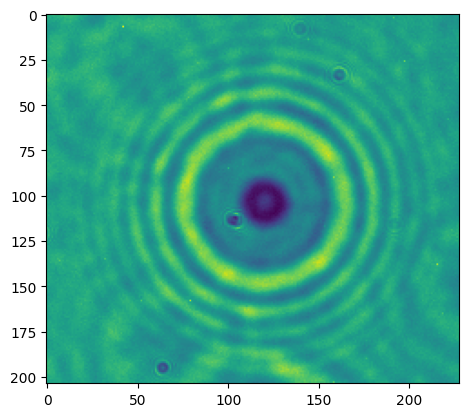

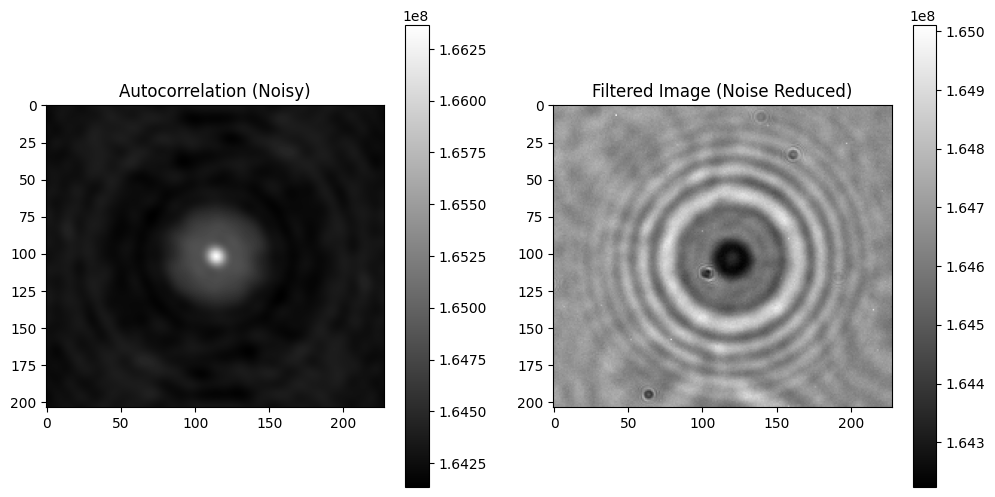

In [13]:


image = cv2.imread('Training_data/frame_000003 copy 6.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
plt.show()

fft_image = fft2(image)

autocorrelation = fft_image * np.conj(fft_image)

# Inverse fourier transform
autocorrelation_spatial = np.real(ifft2(autocorrelation))

# Shift the zero-frequency component to the center
autocorrelation_spatial_shifted = fftshift(autocorrelation_spatial)

# autocorrelation_spatial_shifted = autocorrelation_spatial_shifted / np.max(autocorrelation_spatial_shifted)

# reduce noise
smoothed_autocorrelation = gaussian_filter(autocorrelation_spatial_shifted, sigma=10)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Autocorrelation (Noisy)")
plt.imshow(autocorrelation_spatial_shifted, cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Smoothed Autocorrelation")
plt.imshow(smoothed_autocorrelation, cmap='gray')
plt.colorbar()

# Apply smoothed autocorrelation as a filter in frequency domain
filtered_image_fft = fft_image * fftshift(smoothed_autocorrelation)

# Getting real image
filtered_image = np.real(ifft2(filtered_image_fft))


plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image (Noise Reduced)")
plt.show()


plt.show()

## Autocorrelation in spatial domain (slower, more precise(maybe???)) 

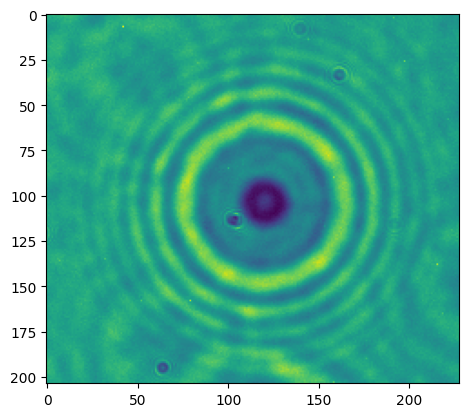

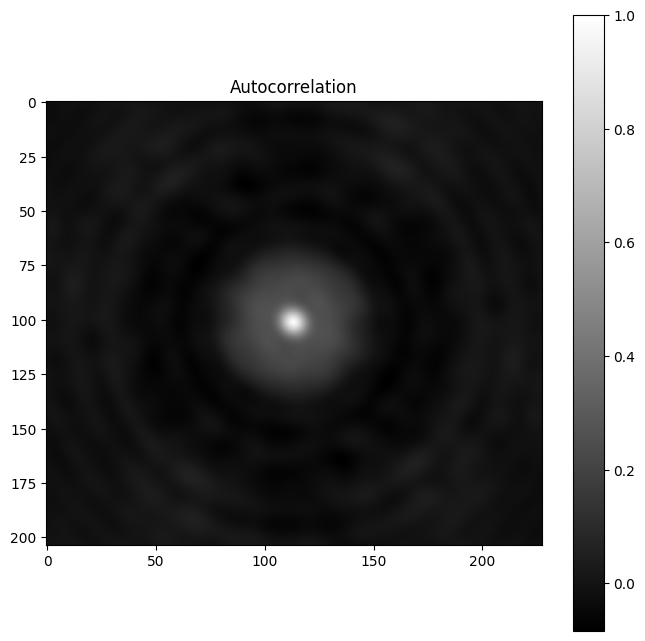

In [24]:
from scipy.signal import correlate2d

image = cv2.imread('Training_data/frame_000003 copy 6.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
plt.show()
# normalise
image_normalized = image - np.mean(image)

# Compute 2D autocorrelation using correlate2d
autocorr = correlate2d(image_normalized, image_normalized, mode='same')

autocorr /= np.max(np.abs(autocorr))

plt.figure(figsize=(8, 8))
plt.imshow(autocorr, cmap='gray')
plt.title("Autocorrelation")
plt.colorbar()
plt.show()

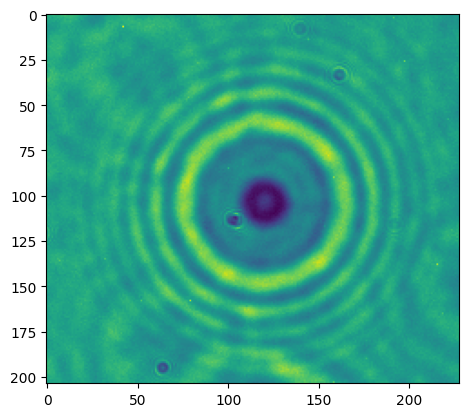

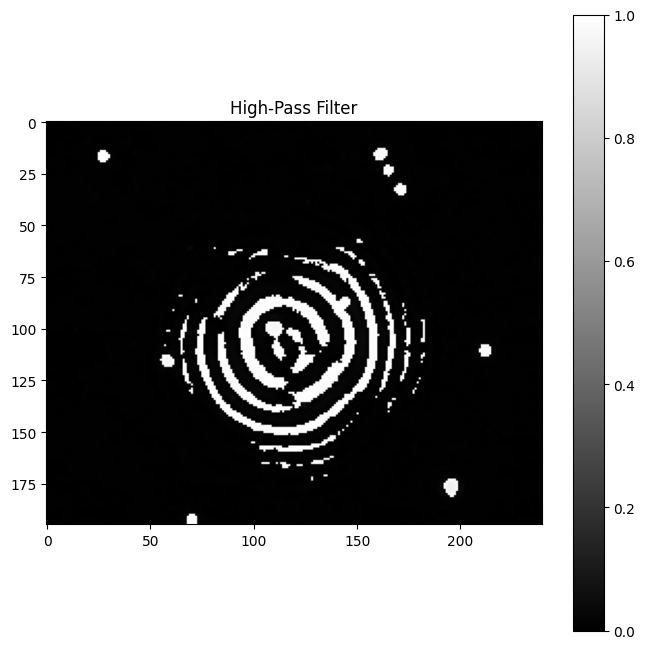

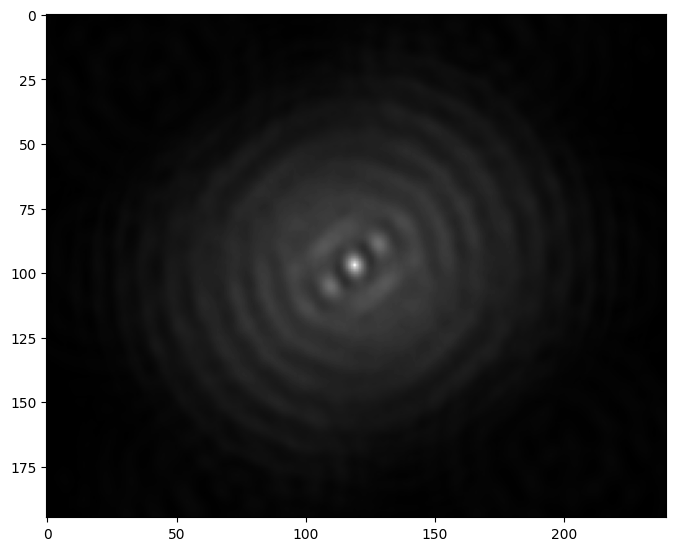

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.signal import correlate2d

# Load the autocorrelation image (use your actual image)
autocorr_image = cv2.imread('Training_data/frame_000003 copy 2.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image)
plt.show()

# Apply a Gaussian blur to the autocorrelation image to create a low-pass filtered version
blurred_image = gaussian_filter(autocorr_image, sigma=3)

# Subtract the blurred image (low-pass filter) from the original to get the high-pass image
high_pass_image = autocorr_image - blurred_image

# Normalize the high-pass image to improve contrast
high_pass_image = high_pass_image - high_pass_image.min()
high_pass_image = high_pass_image / high_pass_image.max()

# Display the high-pass filtered image
plt.figure(figsize=(8, 8))
plt.imshow(high_pass_image, cmap='gray')
plt.title("High-Pass Filter")
plt.colorbar()
plt.show()

autocorr = correlate2d(high_pass_image, high_pass_image, mode='same')

autocorr /= np.max(np.abs(autocorr))

plt.figure(figsize=(8, 8))
plt.imshow(autocorr, cmap='gray')
plt.show()


In [ ]:
def autocorrelation(image):
    

    image = cv2.imread('Training_data/frame_000003 copy 6.png', cv2.IMREAD_GRAYSCALE)
    plt.imshow(image)
    plt.show()
    # normalise
    image_normalized = image - np.mean(image)

    # Compute 2D autocorrelation using correlate2d
    autocorr = correlate2d(image_normalized, image_normalized, mode='same')

    autocorr /= np.max(np.abs(autocorr))

    plt.figure(figsize=(8, 8))
    plt.imshow(autocorr, cmap='gray')
    plt.title("Autocorrelation")
    plt.colorbar()
    plt.show()